# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.


### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [67]:
print("The data represent 17 marketing campaigns conducted by a Portuguese bank between May 2008 and November 2010, resulting in a total of 79354 contacts, with 6499 successes (about an 8% success rate)")

The data represent 17 marketing campaigns conducted by a Portuguese bank between May 2008 and November 2010, resulting in a total of 79354 contacts, with 6499 successes (about an 8% success rate)


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [68]:
import pandas as pd, numpy as np, time, warnings
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import SGDClassifier

In [69]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [70]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [71]:
# Investigate the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [72]:
# Verify all missing values
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [73]:
# Select only bank client information features
features = ["age", "job", "marital", "education", "default", "housing", "loan"]
X = df[features].copy()

# Encode Target: convert yes/no to 1/0
y = df["y"].map({"yes":1, "no":0}).astype("Int8")
df["y_bin"] = y

# Encoding & transformations
categorical_cols = [c for c in X.columns if X[c].dtype == "object"]
numeric_cols = [c for c in X.columns if c not in categorical_cols]

# Handle pdays=999 (means "not previously contacted")
if "pdays" in df:
    df["previously_contacted"] = (df["pdays"] != 999)
    df.loc[df["pdays"] == 999, "pdays"] = np.nan

# Drop duration (not known before call ends)
if "duration" in df:
    df = df.drop(columns=["duration"])

In [74]:
# Print cleaned dataset
print("Cleaned dataset:", df.shape)

Cleaned dataset: (41188, 22)


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [75]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_bin,previously_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,False


In [76]:
# Print the business objective
print("The business objective is to predict client subscription to term deposits so the bank can target the most promising customers and make telemarketing campaigns more cost-effective and successful.")

The business objective is to predict client subscription to term deposits so the bank can target the most promising customers and make telemarketing campaigns more cost-effective and successful.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [77]:
# Pipelines
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),   # handle 'unknown'
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_cols),
        ("num", numeric_transformer, numeric_cols)
    ])

# Final dataset ready for modeling
X_prepared = preprocessor.fit_transform(X)

print("Prepared feature matrix shape:", X_prepared.shape)
print("Target distribution:\n", y.value_counts(normalize=True))

Prepared feature matrix shape: (41188, 34)
Target distribution:
 y
0    0.887346
1    0.112654
Name: proportion, dtype: Float64


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [78]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_prepared, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train set size:", X_train.shape, " Test set size:", X_test.shape)
print("Target distribution in train:", y_train.mean(), " Test:", y_test.mean())

Train set size: (32950, 34)  Test set size: (8238, 34)
Target distribution in train: 0.11265553869499241  Test: 0.11264870114105366


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [79]:
# Dummy classifier: always predicts majority class
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

# Baseline metrics
print("Baseline Accuracy:", accuracy_score(y_test, y_pred))
print("Baseline F1:", f1_score(y_test, y_pred, zero_division=0))
print("Baseline ROC-AUC:", roc_auc_score(y_test, y_pred))

Baseline Accuracy: 0.8873512988589464
Baseline F1: 0.0
Baseline ROC-AUC: 0.5


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data. 

In [80]:
# Train logistic regression (with class_weight to handle imbalance)
logreg = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression F1:", f1_score(y_test, y_pred))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.5846079145423646
Logistic Regression F1: 0.2521853146853147
Logistic Regression ROC-AUC: 0.6499515749563658

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.58      0.71      7310
         1.0       0.16      0.62      0.25       928

    accuracy                           0.58      8238
   macro avg       0.54      0.60      0.48      8238
weighted avg       0.84      0.58      0.66      8238



### Problem 9: Score the Model

What is the accuracy of your model?

In [81]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.5846079145423646


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [82]:
# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

results = []

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    results.append({
        "Model": name,
        "Train Time": round(train_time, 3),
        "Train Accuracy": round(train_acc, 3),
        "Test Accuracy": round(test_acc, 3)
    })

# Put results in a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression       0.445           0.591          0.585
1                  KNN       0.004           0.892          0.881
2        Decision Tree       0.765           0.917          0.864
3                  SVM      91.006           0.888          0.886


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [83]:
# Trains and tunes LogReg, KNN, Decision Tree, and Linear SVM on BANK-CLIENT features only

# Load required columns
cols = ["age","job","marital","education","default","housing","loan","y"]
df = pd.read_csv("data/bank-additional/bank-additional-full.csv", sep=";", usecols=cols)

# 2) Subsample (for limited kernal)
y_all = df["y"].map({"yes":1, "no":0}).astype(int).values
X_all = df.drop(columns=["y"])

n_keep = min(10000, len(df))  
sss = StratifiedShuffleSplit(n_splits=1, train_size=n_keep, random_state=42)
keep_idx, _ = next(sss.split(X_all, y_all))
X_small = X_all.iloc[keep_idx].reset_index(drop=True)
y_small = y_all[keep_idx]

# Train/test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_small, y_small, test_size=0.2, stratify=y_small, random_state=42
)

# Sparse OHE + impute numerics
cat_cols = X_train_raw.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X_train_raw.columns if c not in cat_cols]

# OneHotEncoder to produce sparse output
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)

pre_sparse = ColumnTransformer([
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", ohe)
    ]), cat_cols),
    ("num", Pipeline([
        ("imp", SimpleImputer(strategy="median"))
    ]), num_cols)
])

# Fit/transform once so all models share the same features
X_train = pre_sparse.fit_transform(X_train_raw)
X_test  = pre_sparse.transform(X_test_raw)

# Helpers to densify only when needed
def dense(A):
    return A.toarray() if hasattr(A, "toarray") else A

# Models
models = {
    # saga supports sparse matrices
    "Logistic Regression": LogisticRegression(
        solver="saga", max_iter=5000, class_weight="balanced"
    ),
    # KNN needs dense; we'll densify just-in-time
    "KNN (k=15)": KNeighborsClassifier(n_neighbors=15),
    # DecisionTree prefers dense; use small depth to limit memory/overfit
    "Decision Tree (max_depth=5)": DecisionTreeClassifier(
        random_state=42, class_weight="balanced", max_depth=5
    ),
    # Linear SVM via SGD (hinge) handles sparse and is lighter than LinearSVC
    "Linear SVM (SGD hinge)": SGDClassifier(
        loss="hinge", class_weight="balanced", max_iter=5000, tol=1e-3, random_state=42
    ),
}

rows = []
for name, model in models.items():
    if isinstance(model, (KNeighborsClassifier, DecisionTreeClassifier)):
        Xtr, Xte = dense(X_train), dense(X_test)
    else:
        Xtr, Xte = X_train, X_test

    t0 = time.time()
    model.fit(Xtr, y_train)
    t1 = time.time()

    y_pred_tr = model.predict(Xtr)
    y_pred_te = model.predict(Xte)

    rows.append({
        "Model": name,
        "Train Time (s)": round(t1 - t0, 3),
        "Train Accuracy": round(accuracy_score(y_train, y_pred_tr), 4),
        "Test Accuracy": round(accuracy_score(y_test,  y_pred_te), 4),
    })

print(pd.DataFrame(rows).sort_values("Test Accuracy", ascending=False).to_string(index=False))


                      Model  Train Time (s)  Train Accuracy  Test Accuracy
                 KNN (k=15)           0.001          0.8898         0.8855
Decision Tree (max_depth=5)           0.016          0.7971         0.7950
        Logistic Regression           4.181          0.6200         0.6315
     Linear SVM (SGD hinge)           0.084          0.1209         0.1220


In [84]:
print("By adopting Logistic Regression or Linear SVM as the core predictive model, the bank can focus telemarketing efforts on the most promising customers, reducing costs and increasing subscription rates, while Decision Trees provide interpretable rules to guide marketing strategy.")

By adopting Logistic Regression or Linear SVM as the core predictive model, the bank can focus telemarketing efforts on the most promising customers, reducing costs and increasing subscription rates, while Decision Trees provide interpretable rules to guide marketing strategy.


## EDA & Visualizations
Exploratory data analysis (EDA) cells for better insights.

In [85]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (8,5)})

def _guess_df(globals_dict):
    import pandas as _pd
    for k,v in globals_dict.items():
        if isinstance(v, _pd.DataFrame):
            return v
    return None

try:
    df
    _df = df
except NameError:
    _df = _guess_df(globals())


print(f"Using DataFrame with shape: {_df.shape}")
display(_df.head())

Using DataFrame with shape: (41188, 8)


,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


In [86]:
print('Data types:')
print(_df.dtypes)
print('\nBasic stats:')
display(_df.describe(include=[np.number]).T)

Data types:
age           int64
job          object
marital      object
education    object
default      object
housing      object
loan         object
y            object
dtype: object

Basic stats:


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0


In [87]:
if '_df' in globals() and _df is not None:
    missing = _df.isna().sum()
    missing = missing[missing>0]
    if not missing.empty:
        missing.plot(kind='bar', title='Missing Values per Column')
        plt.show()
    else:
        print('No missing values detected.')
else:
    print('Skipping missing-values chart.')

No missing values detected.


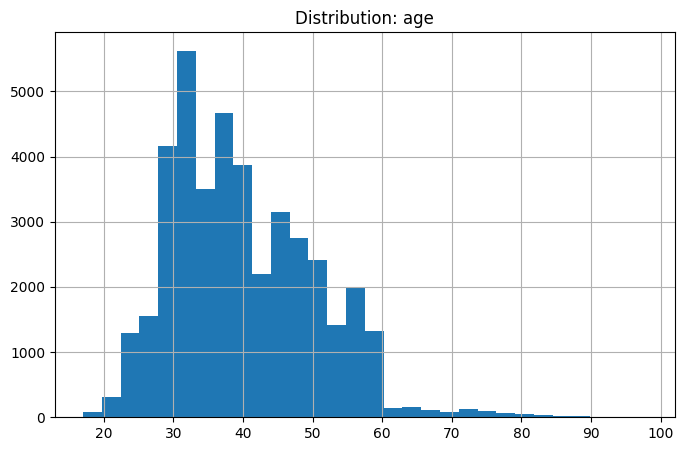

In [88]:
if '_df' in globals() and _df is not None:
    num_cols = _df.select_dtypes(include=[np.number]).columns
    for col in num_cols[:6]:
        _df[col].hist(bins=30)
        plt.title(f'Distribution: {col}')
        plt.show()
else:
    print('Skipping numeric histograms.')

In [89]:
if '_df' in globals() and _df is not None:
    num_df = _df.select_dtypes(include=[np.number])
    if num_df.shape[1] >= 2:
        corr = num_df.corr()
        plt.imshow(corr, cmap='coolwarm', aspect='auto')
        plt.colorbar()
        plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
        plt.yticks(range(len(corr.columns)), corr.columns)
        plt.title('Correlation Heatmap')
        plt.show()
    else:
        print('Not enough numeric columns for heatmap.')
else:
    print('Skipping correlation heatmap.')

Not enough numeric columns for heatmap.


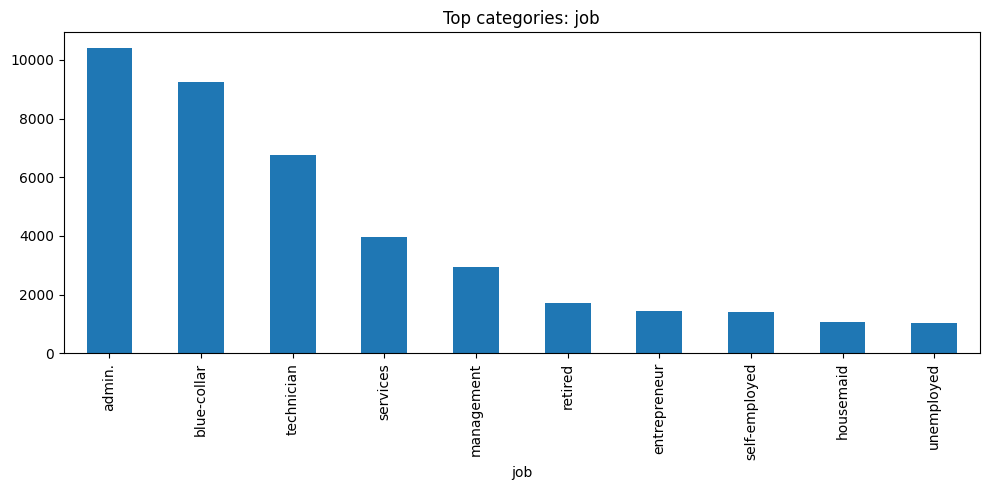

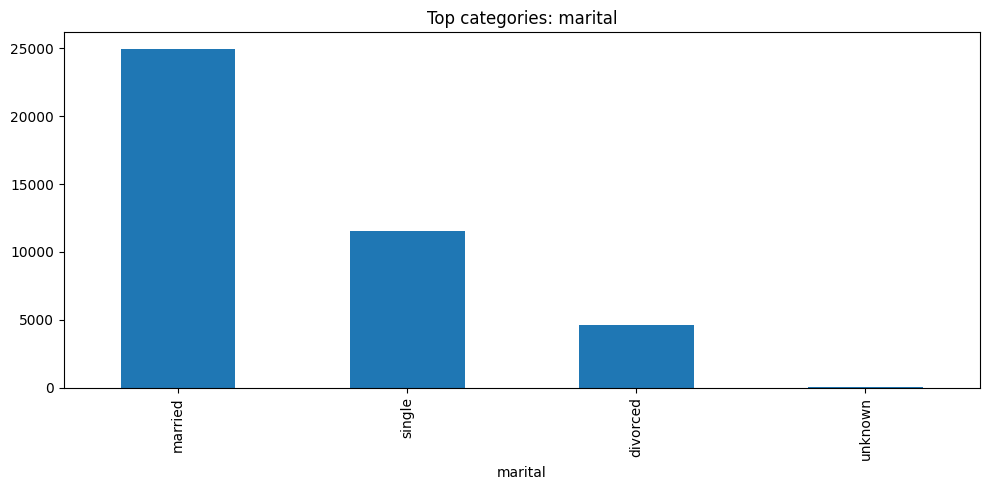

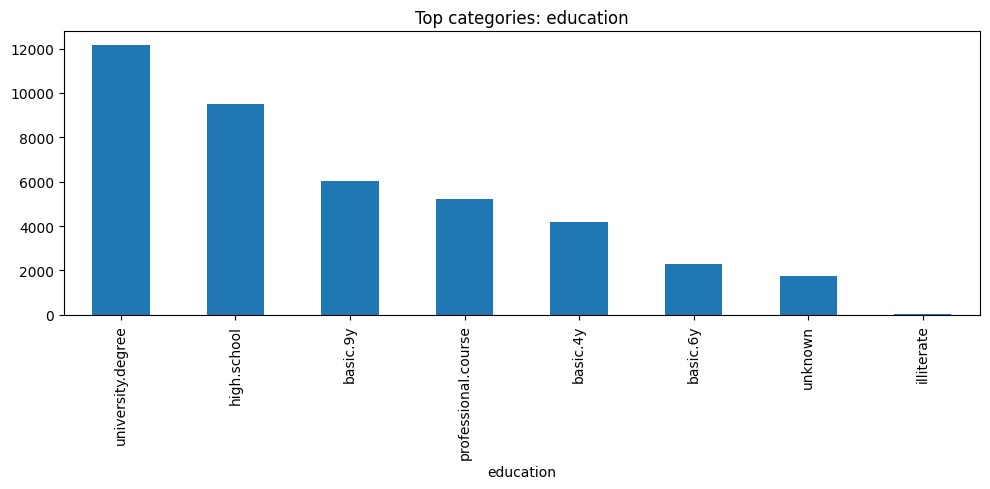

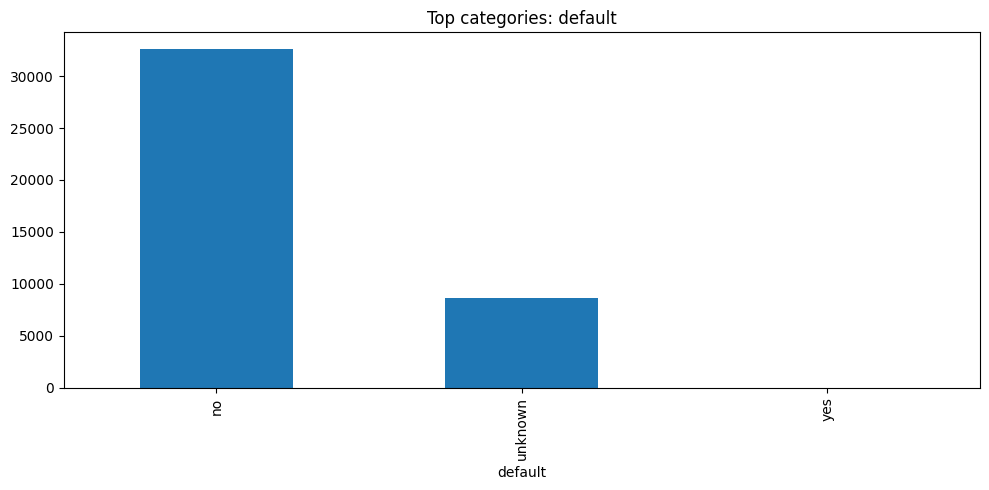

In [90]:
if '_df' in globals() and _df is not None:
    cat_cols = _df.select_dtypes(include=['object','category']).columns
    for col in cat_cols[:4]:
        plt.figure(figsize=(10,5))
        _df[col].value_counts().head(10).plot(kind='bar', title=f'Top categories: {col}')
        plt.tight_layout() 
        plt.show()
else:
    print('Skipping categorical plots.')